In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import PIL
from scipy.signal import convolve2d
matplotlib.rcParams['figure.figsize'] = [8., 8]

## 1. PSF of a Cassegraine Telescope with Struts

*Author: Mia Morrell*

Calculate the ideal point spread function for a Cassegraine-type design with 4 struts to hold the secondary creating an extra obstruction. Compare to an actual color image from the Hubble Space Telescope and comment on where the diffraction-related features in that image come from.

A Cassegraine telescope has a concave parabaloid primary mirror and a convex hyperbolic secondary mirror. The resulting aperture is a "donut" shape with 4 struts holding up the secondary mirror. In the below image, 3 circles are the pads securing the primary mirror on the Hubble Space Telescope (HST). In the following exercise we will neglect these pads.

To get the point spread function (PSF), we need to take the squared modulus of the Fourier transform of the aperture. The aperture function is the following on a grid centered about $(x,y) = (0,0)$:

$f(x,y) = 0$ if $x^2+y^2>R^2$ OR $|y-x|<\frac{w_s}{2}$ OR $|-y-x| = -\frac{w_s}{2}$

$f(x,y) = 1$ otherwise

where $\frac{w_s}{2}$ is the strut width.

Note that in the following calculations I am completely ignoring units, I'm just qualitatively explaining how the aperture structure leads to diffraction-related features. 

### Define the aperture

This code creates this aperture. Note that we leave a lot of zero padding. This is because the discrete FT is the Fourier Transform of the periodically continued function, and we want to separate the images from each other.

In [17]:
dim = 501
R = 90
r = 28
strut_width = 5
grid = np.ones((dim,dim))
for i in range(dim):
    for j in range(dim):
        if ((i-dim/2)**2+(j-dim/2)**2)>R**2:
            grid[i,j] = 0
        if ((i-dim/2)**2+(j-dim/2)**2)<r**2:
            grid[i,j] = 0
        if np.abs(i-j)<strut_width/2:
            grid[i,j] = 0
        if np.abs(-i-j+dim)<strut_width/2:
            grid[i,j] = 0

Text(0.5, 1.0, 'aperature')

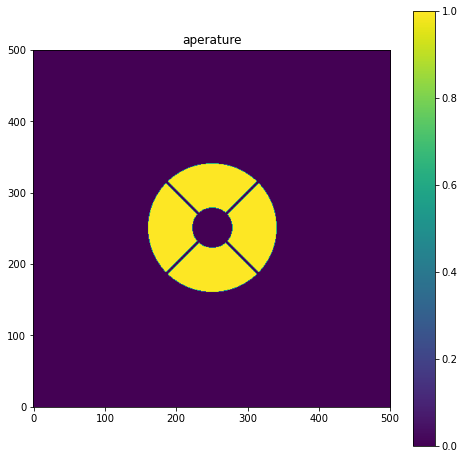

In [18]:
plt.imshow(grid, origin = 'lower', cmap = 'viridis')
plt.colorbar()
plt.title('aperature')

### Fourier Transform to get PSF

Now we take the Fourier transform and square it. We will also normalize it so its integral is unity, which is the standard thing to do for a PSF (so you can use it as a Green's function).

In [21]:
grid_ft = np.fft.fft2(grid)
grid_ft = np.fft.fftshift(grid_ft)
psf = np.abs(grid_ft)**2
psf = psf / psf.sum()

Text(0.5, 1.0, 'log PSF')

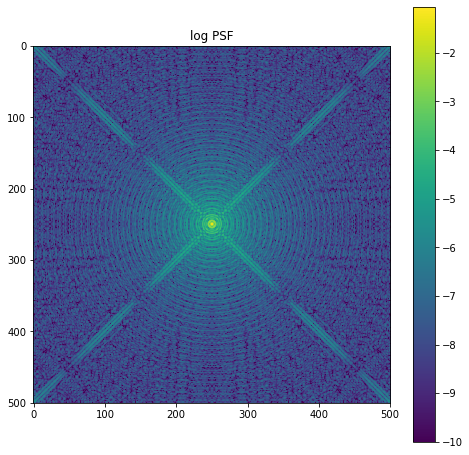

In [23]:
plt.imshow(np.log10(psf), vmin=-10)
plt.colorbar()
plt.title('log PSF')

### Compare to actual HST

Now we can compare to an actual HST image, a JPG of which we retrieve below.

In [25]:
r = requests.get('https://cdn.spacetelescope.org/archives/images/large/potw1343a.jpg')

In [26]:
fp = open('hst-example.jpg', 'wb')
fp.write(r.content)
fp.close()

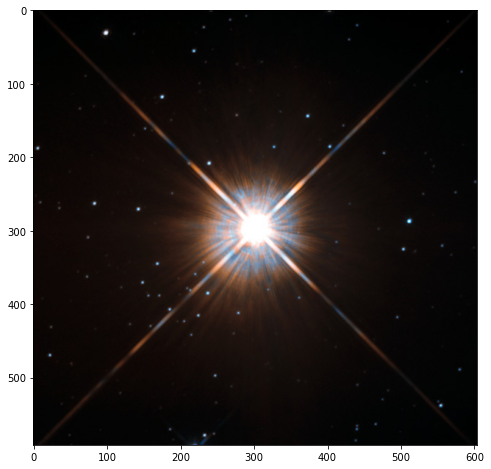

In [33]:
im = PIL.Image.open('hst-example.jpg')
plt.imshow(im)

We can see the four-fold symmetry in the diffraction spikes. You can also see the patterns have "colors" in them. This is because the diffraction pattern's size in the focal plane scales with the wavelength. So the rings and other patterns depend on wavelength. This manifests as different colors when the bands are combined into a single image.